In [ ]:
import pandas as pd

# Reload the dataset (important if earlier assignment failed)
df = pd.read_csv('deliverytime.csv')

# Step 1: Extract delivery times and compute stats
delivery_times = df['Time_taken(min)']

population_mean = delivery_times.mean()
population_std = delivery_times.std()

print(f"Population Mean: {population_mean:.2f} minutes")
print(f"Population Std Dev: {population_std:.2f} minutes")


Population Mean: 26.29 minutes
Population Std Dev: 9.38 minutes


In [ ]:
# Function to generate sample means using CLT
def sample_means(data, sample_size=30, num_samples=1000):
    means = []
    for _ in range(num_samples):
        sample = np.random.choice(data, size=sample_size, replace=True)
        means.append(np.mean(sample))
    return means

# Generate 1000 sample means (each sample of size 30)
sampled_means = sample_means(delivery_times, sample_size=30, num_samples=1000)


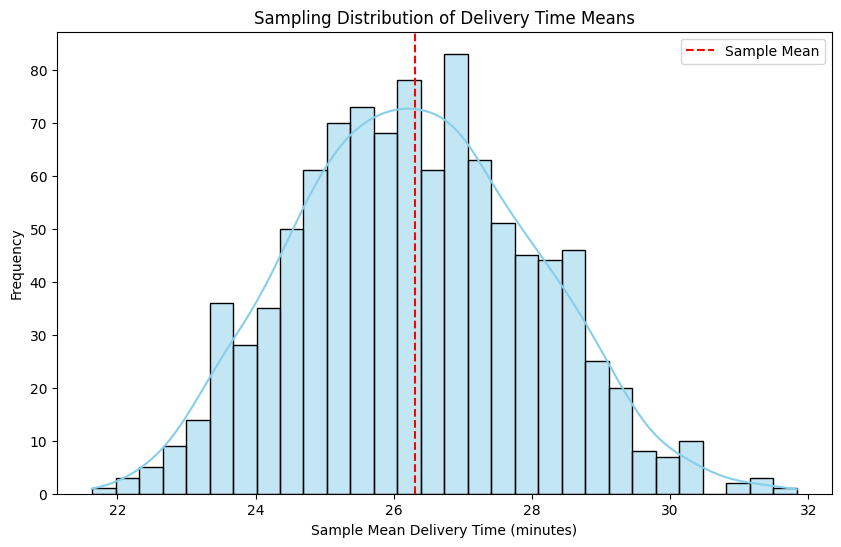

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of sample means
plt.figure(figsize=(10, 6))
sns.histplot(sampled_means, bins=30, kde=True, color='skyblue')

# Add a red line for the mean
plt.axvline(np.mean(sampled_means), color='red', linestyle='--', label='Sample Mean')

plt.title('Sampling Distribution of Delivery Time Means')
plt.xlabel('Sample Mean Delivery Time (minutes)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [ ]:
import scipy.stats as st

# Calculate mean and standard deviation of the sample means
sample_mean = np.mean(sampled_means)
sample_std = np.std(sampled_means)

# 95% Confidence Interval using normal distribution
confidence_interval = st.norm.interval(0.95, loc=sample_mean, scale=sample_std)

print(f"Sample Mean: {sample_mean:.2f} minutes")
print(f"Standard Error: {sample_std:.2f} minutes")
print(f"95% Confidence Interval: {confidence_interval}")


Sample Mean: 26.31 minutes
Standard Error: 1.72 minutes
95% Confidence Interval: (np.float64(22.937941941104782), np.float64(29.682191392228546))


In [ ]:
import pandas as pd

# Load the dataset (update the file path if needed)
df = pd.read_csv('customer_survey_data.csv')

# Select numeric columns for analysis
columns_to_analyze = ['Age', 'AnnualIncome', 'SpendingScore', 'SatisfactionRating']

# Calculate required statistics
summary = df[columns_to_analyze].agg(['mean', 'median', 'std', 'var'])

# Display the result in a readable format
print("Summary Statistics:\n")
print(summary.T)  # Transpose to make attributes the row labels


Summary Statistics:

                        mean  median        std         var
Age                 41.55000    42.0  13.624869  185.637046
AnnualIncome        59.44500    60.0  14.435371  208.379950
SpendingScore       52.44625    53.0  28.823916  830.818134
SatisfactionRating   3.02875     3.0   1.079064    1.164379


Correlation between Annual Income and Satisfaction Rating: -0.01


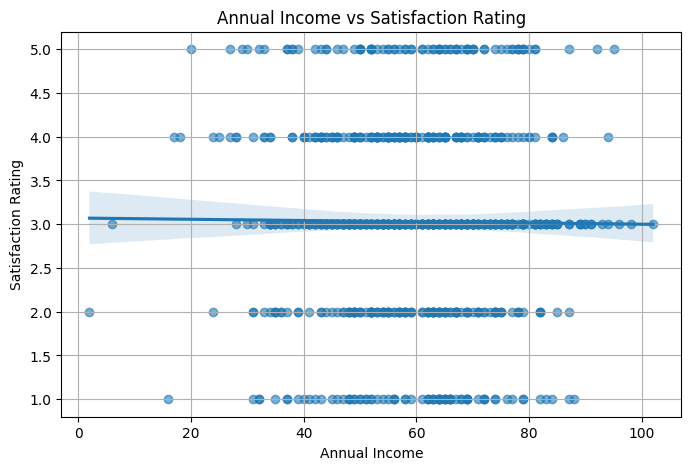


Average Satisfaction Rating by Income Range:
IncomeRange
Very Low     3.647059
Low          3.040921
Medium       2.976440
High         3.500000
Very High         NaN
Name: SatisfactionRating, dtype: float64


/tmp/ipython-input-10-1048741707.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('IncomeRange')['SatisfactionRating'].mean()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Load data
df = pd.read_csv("customer_survey_data.csv")

# Step 1: Correlation
correlation = df['AnnualIncome'].corr(df['SatisfactionRating'])
print(f"Correlation between Annual Income and Satisfaction Rating: {correlation:.2f}")

# Step 2: Scatter Plot with Trend Line
plt.figure(figsize=(8, 5))
sns.regplot(x='AnnualIncome', y='SatisfactionRating', data=df, scatter_kws={'alpha':0.6})
plt.title('Annual Income vs Satisfaction Rating')
plt.xlabel('Annual Income')
plt.ylabel('Satisfaction Rating')
plt.grid(True)
plt.show()

# Step 3: Group by Income Range
df['IncomeRange'] = pd.cut(df['AnnualIncome'], bins=[0, 30, 60, 90, 120, 150], labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
grouped = df.groupby('IncomeRange')['SatisfactionRating'].mean()

print("\nAverage Satisfaction Rating by Income Range:")
print(grouped)
